# K-Means algorithm - Theory
One of the simplest and most used clustering algorithms


![K-means](https://static.javatpoint.com/tutorial/machine-learning/images/k-means-clustering-algorithm-in-machine-learning.png)


## What is clustering?
It is a task of identifying subgroups in the data such that data points in the same subgroup (**cluster**) are very similar while data points in different clusters are very different.

In other words, it is an **unsupervised learning** method where we try to find *homogenous* groups in our data such that the points in each cluster are as similar as possible to one another according to a similarity measure, such as **euclidean distance**. 

## How does k-means work?
> Definition: It is an **iterative algorithm** that tries to partition the dataset into **K** pre-defined **distinct** **non-overlapping** subgroups (**clusters**) where **each data point belongs to only one group**.

Steps:


1.   Specify the number of clusters *K*. There are ways in which you can find the number of clusters and we are going to look at that tomorrow. For today, we use our "intuition" to select a number. 
2.   Select *K* points at random: we need to start somewhere so we start by selecting 3 points at random that will act as our **centroids***. These points don't necessarily have to be any of our data points.
3. Start creating the clusters: to do this, we measure the distance between each of our data points and each of our centroids. We assign each data point to the closest centroid. 
4. Compute new centroids for each cluster. 
5. Calculate the within-cluster variation (calculate the total variance of each cluster). 
6. Repeat steps 3-5. The stopping criteria is up to whoever is running the algorithm, but it is usually the number of iterations. The [default value for k-means using sklearn is 300](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). You can also use convergence; we say that an algorithm has converged when the progress between iterations is non-existent or minimal. 
7. This is done 10 times with SKLearn by default, but this can be changed. The clusters with the least within-cluster variation (formally known as Within-Cluster Sum of Squares or WCSS for whoever wants to check out the formula) are then chosen to be the "best" clusters. 

> *centroid = center of our cluster

[This website](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/) is great for showing how k-means clusters and re-clusters.

# K-Means algorithm - Practice

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
sheet_id = "1tGEwxTaRhczKEwuGYBiYzpihRXrkBqMVMTG_Pxwo-zU"
sheet_name = "18136796"
url =  f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={sheet_name}'

df = pd.read_csv(url, index_col='student', nrows=16)
df.drop(['favorite_color'], axis=1, inplace=True)
df

,broccoli,brussels_sprouts,hamburger (meat),oysters (raw),onion (raw),peas,olives,blue_cheese,whisky,age
student,,,,,,,,,,
Alexandra,10,10,10,10,10,7,6,10,0,27
Amelie,10,10,1,1,10,9,10,4,2,22
Daniela,10,10,10,0,3,10,10,10,10,44
Jorge,3,3,9,9,5,5,8,10,7,46
Kaj,3,10,7,8,8,10,8,10,9,59
Konstantin,5,0,9,5,10,8,10,5,8,43
Liane,7,3,3,5,3,7,7,5,1,37
Mital,8,5,0,0,2,9,8,0,4,35
Patrick,8,0,5,0,0,8,4,0,0,34


## Scale

In [5]:
# 1. import the transformer
from sklearn.preprocessing import MinMaxScaler
 
# 2. initialize the transformer (optionally, set parameters)
my_min_max = MinMaxScaler()
 
# 3. fit the transformer to the data
my_min_max.fit(df)
 
# 4. use the transformer to transform the data
scaled_features = my_min_max.transform(df)
 
# 5. reconvert the transformed data back to a DataFrame
scaled_features_df = pd.DataFrame(scaled_features,
                                  index=df.index,
                                  columns=df.columns)

scaled_features_df

,broccoli,brussels_sprouts,hamburger (meat),oysters (raw),onion (raw),peas,olives,blue_cheese,whisky,age
student,,,,,,,,,,
Alexandra,1.000000,1.0,1.0,1.0,1.0,0.4,0.500,1.0,0.0,0.065789
Amelie,1.000000,1.0,0.1,0.1,1.0,0.8,1.000,0.4,0.2,0.000000
Daniela,1.000000,1.0,1.0,0.0,1.0,1.0,1.000,1.0,1.0,0.289474
Jorge,0.000000,0.3,0.9,0.9,1.0,0.0,0.750,1.0,0.7,0.315789
Kaj,0.000000,1.0,0.7,0.8,1.0,1.0,0.750,1.0,0.9,0.486842
Konstantin,0.285714,0.0,0.9,0.5,1.0,0.6,1.000,0.5,0.8,0.276316
Liane,0.571429,0.3,0.3,0.5,1.0,0.4,0.625,0.5,0.1,0.197368
Mital,0.714286,0.5,0.0,0.0,1.0,0.8,0.750,0.0,0.4,0.171053
Patrick,0.714286,0.0,0.5,0.0,1.0,0.6,0.250,0.0,0.0,0.157895


## Kmeans

In [11]:
# 1. import the model
from sklearn.cluster import KMeans
 
# 2. initialize the model
my_kmeans = KMeans(n_clusters= 5, random_state=123)
 
# 3. fit the model to the data
my_kmeans.fit(scaled_features_df) # pass your scaled data here
 
# 4. obtain the cluster output
clusters = my_kmeans.labels_ # pass your scaled data here

# 5. attach the cluster output to our original DataFrame
scaled_features_df["cluster"] = clusters

In [12]:
scaled_features_df

,broccoli,brussels_sprouts,hamburger (meat),oysters (raw),onion (raw),peas,olives,blue_cheese,whisky,age,cluster
student,,,,,,,,,,,
Alexandra,1.000000,1.0,1.0,1.0,1.0,0.4,0.500,1.0,0.0,0.065789,2
Amelie,1.000000,1.0,0.1,0.1,1.0,0.8,1.000,0.4,0.2,0.000000,2
Daniela,1.000000,1.0,1.0,0.0,1.0,1.0,1.000,1.0,1.0,0.289474,0
Jorge,0.000000,0.3,0.9,0.9,1.0,0.0,0.750,1.0,0.7,0.315789,4
Kaj,0.000000,1.0,0.7,0.8,1.0,1.0,0.750,1.0,0.9,0.486842,0
Konstantin,0.285714,0.0,0.9,0.5,1.0,0.6,1.000,0.5,0.8,0.276316,4
Liane,0.571429,0.3,0.3,0.5,1.0,0.4,0.625,0.5,0.1,0.197368,1
Mital,0.714286,0.5,0.0,0.0,1.0,0.8,0.750,0.0,0.4,0.171053,1
Patrick,0.714286,0.0,0.5,0.0,1.0,0.6,0.250,0.0,0.0,0.157895,1


In [14]:
scaled_features_df.sort_values(by='cluster')

,broccoli,brussels_sprouts,hamburger (meat),oysters (raw),onion (raw),peas,olives,blue_cheese,whisky,age,cluster
student,,,,,,,,,,,
Daniela,1.000000,1.0,1.0,0.0,1.0,1.0,1.000,1.0,1.0,0.289474,0
Kaj,0.000000,1.0,0.7,0.8,1.0,1.0,0.750,1.0,0.9,0.486842,0
Ben,1.000000,1.0,0.6,0.6,1.0,1.0,1.000,0.7,1.0,0.184211,0
Liane,0.571429,0.3,0.3,0.5,1.0,0.4,0.625,0.5,0.1,0.197368,1
Mital,0.714286,0.5,0.0,0.0,1.0,0.8,0.750,0.0,0.4,0.171053,1
Patrick,0.714286,0.0,0.5,0.0,1.0,0.6,0.250,0.0,0.0,0.157895,1
Sai,0.571429,0.0,0.0,0.0,1.0,0.0,0.625,0.0,0.2,0.118421,1
Alexandra,1.000000,1.0,1.0,1.0,1.0,0.4,0.500,1.0,0.0,0.065789,2
Amelie,1.000000,1.0,0.1,0.1,1.0,0.8,1.000,0.4,0.2,0.000000,2


### investigating the clusters

In [15]:
scaled_features_df.groupby(by="cluster").mean() 

,broccoli,brussels_sprouts,hamburger (meat),oysters (raw),onion (raw),peas,olives,blue_cheese,whisky,age
cluster,,,,,,,,,,
0,0.666667,1.00,0.766667,0.466667,1.0,1.000000,0.916667,0.900,0.966667,0.320175
1,0.642857,0.20,0.200000,0.125000,1.0,0.450000,0.562500,0.125,0.175000,0.161184
2,0.904762,1.00,0.466667,0.666667,1.0,0.666667,0.750000,0.500,0.066667,0.092105
3,0.857143,0.80,0.700000,0.100000,1.0,1.000000,0.000000,0.700,0.100000,1.000000
4,0.285714,0.32,0.700000,0.420000,0.8,0.560000,0.800000,0.580,0.600000,0.202632


In [19]:
scaled_features_df.loc[scaled_features_df.cluster == 0, :]

,broccoli,brussels_sprouts,hamburger (meat),oysters (raw),onion (raw),peas,olives,blue_cheese,whisky,age,cluster
student,,,,,,,,,,,
Daniela,1.0,1.0,1.0,0.0,1.0,1.0,1.00,1.0,1.0,0.289474,0
Kaj,0.0,1.0,0.7,0.8,1.0,1.0,0.75,1.0,0.9,0.486842,0
Ben,1.0,1.0,0.6,0.6,1.0,1.0,1.00,0.7,1.0,0.184211,0


In [20]:
scaled_features_df.loc[scaled_features_df.cluster == 4, :]

,broccoli,brussels_sprouts,hamburger (meat),oysters (raw),onion (raw),peas,olives,blue_cheese,whisky,age,cluster
student,,,,,,,,,,,
Jorge,0.000000,0.3,0.9,0.9,1.0,0.0,0.75,1.0,0.7,0.315789,4
Konstantin,0.285714,0.0,0.9,0.5,1.0,0.6,1.00,0.5,0.8,0.276316,4
Sabahuddin,0.000000,0.2,0.0,0.0,1.0,1.0,0.50,0.6,0.7,0.144737,4
Tal,0.571429,0.6,0.8,0.0,0.0,0.6,1.00,0.7,0.3,0.118421,4
Yanish,0.571429,0.5,0.9,0.7,1.0,0.6,0.75,0.1,0.5,0.157895,4


### centroid distances

In [21]:
centroids = my_kmeans.cluster_centers_
pd.DataFrame(centroids)

,0,1,2,3,4,5,6,7,8,9
0,0.666667,1.00,0.766667,0.466667,1.0,1.000000,0.916667,0.900,0.966667,0.320175
1,0.642857,0.20,0.200000,0.125000,1.0,0.450000,0.562500,0.125,0.175000,0.161184
2,0.904762,1.00,0.466667,0.666667,1.0,0.666667,0.750000,0.500,0.066667,0.092105
3,0.857143,0.80,0.700000,0.100000,1.0,1.000000,0.000000,0.700,0.100000,1.000000
4,0.285714,0.32,0.700000,0.420000,0.8,0.560000,0.800000,0.580,0.600000,0.202632


In [22]:
centroids

array([[0.66666667, 1.        , 0.76666667, 0.46666667, 0.99999996,
        1.        , 0.91666667, 0.9       , 0.96666667, 0.32017544],
       [0.64285714, 0.2       , 0.2       , 0.125     , 0.99999992,
        0.45      , 0.5625    , 0.125     , 0.175     , 0.16118421],
       [0.9047619 , 1.        , 0.46666667, 0.66666667, 0.99999999,
        0.66666667, 0.75      , 0.5       , 0.06666667, 0.09210526],
       [0.85714286, 0.8       , 0.7       , 0.1       , 0.99999995,
        1.        , 0.        , 0.7       , 0.1       , 1.        ],
       [0.28571429, 0.32      , 0.7       , 0.42      , 0.79999997,
        0.56      , 0.8       , 0.58      , 0.6       , 0.20263158]])

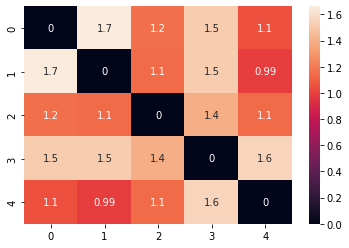

In [25]:
from sklearn.metrics import pairwise_distances
centroid_distances = pairwise_distances(centroids)

sns.heatmap(centroid_distances, annot=True);